<a href="https://colab.research.google.com/github/Stephen-Wau/Simple-Scraping-App-GooglePlayStore/blob/master/ScrapingDataPlayStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Scrape Data Dari Play Store**

 Menginstall Library Scraping Untuk Google Play Store




In [1]:
!pip install google-play-scraper

Mengimport library yang diperlukan untuk Scraping

In [2]:
from google_play_scraper import app
import pandas as pd #untuk pembersihan data, manipulasi data dan analisis data.
import numpy as np #Untuk melakukan perhitungan saintifik seperti matriks, aljabar, statistik, dsb.

Scraping Data (Ada 2  Cara)

In [3]:
#Scrape semua ulasan yang tersedia
# from google_play_scraper import Sort, reviews_all

# us_reviews = reviews_all(
#     'com.whatsapp',
#     sleep_milliseconds=0, #defaults to 0,
#     lang='id', #defaults to 'en'
#     country='id', #defaults to 'us'
#     sort=Sort.NEWEST, #defaults to Sort.MOST_RELEVANT
# )

In [14]:
#Scrape sesuai jumlah data yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.whatsapp',
    lang='id', #defaults to 'en'
    country='id', #defaults to 'us'
    sort=Sort.NEWEST, #defaults to Sort.MOST_RELEVANT
    count=10, #defaults to 100
    filter_score_with=None #Defauls None(All Score) gunakan angka 1 -5 untuk memilih rating
)

ambil link aplikasi/game yang ingin di scraping kemudian copy di code diatas. salin link sesuai dengan yang tercopy seperti pada gambar dibawah
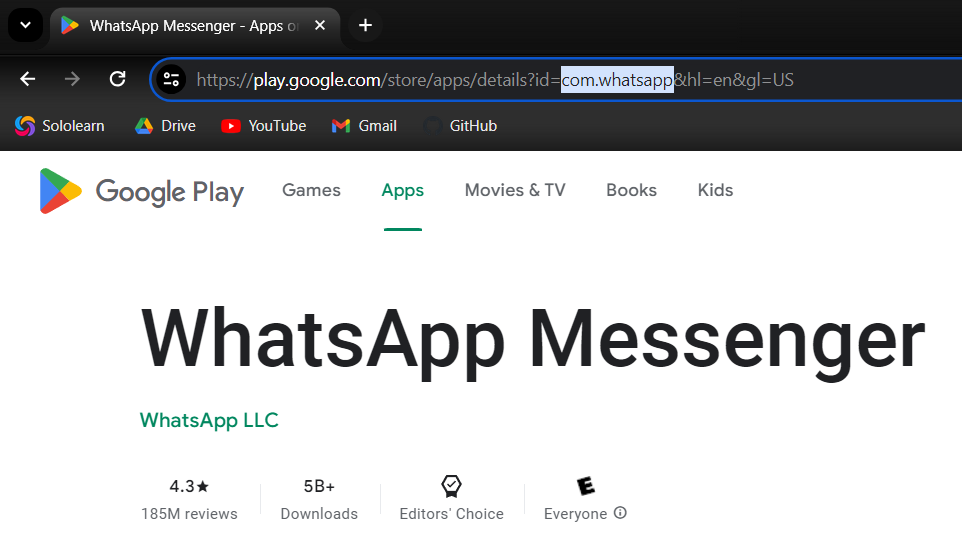

jika anda ingin mengambil data menggunakan filter paling relevan/most relevan

*   jika anda ingin mengambil data menggunakan filter paling relevan/most relevan maka ganti value pada baris sort=Sort dengan nilai "Sort.MOST_RELEVANT"
*   Jika ingin menggambil data dengan bahasa tertentu saja maka edit value pada baris lang= kemudian masukan sesuai bahasa yg dinginkan
*   Jika ingin data dengan score/rating tertentu cukup isi value angka pada barus filter_score_with= dengan rating yg dinginkan







Defenisikan data reviews kedalam dataframe

In [15]:
df_data = pd.DataFrame(np.array(result),columns=['review'])
df_data = df_data.join(pd.DataFrame(df_data.pop('review').tolist()))
df_data.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fb5e6215-164e-41a5-89f5-f9cf077b317b,Teti Ningsih,https://play-lh.googleusercontent.com/a/ACg8oc...,Sukses,5,0,2.23.21.85,2024-01-07 06:18:04,None,None,2.23.21.85
1,cc035da8-8533-42ed-9037-2315e5a9a91b,sri lestari,https://play-lh.googleusercontent.com/a-/ALV-U...,Belakangan ini whats app saya sering di blok d...,3,0,2.23.4.79,2024-01-07 06:17:58,None,None,2.23.4.79
2,5e8d2996-459f-4422-98a6-a40de6e50a3d,Kucing Putih,https://play-lh.googleusercontent.com/a/ACg8oc...,Mantaaap,5,0,None,2024-01-07 06:17:52,None,None,None
3,05b77612-3e99-4081-849f-fc84861d0799,Eliya Wati,https://play-lh.googleusercontent.com/a/ACg8oc...,Sabar,1,0,None,2024-01-07 06:17:29,None,None,None
4,577c3f8a-924b-4541-b585-40fc4240b62c,Andrew Dfw,https://play-lh.googleusercontent.com/a/ACg8oc...,Sesuai ekpetasi,5,0,2.23.25.83,2024-01-07 06:17:14,None,None,2.23.25.83


Sortir frame/column yang perlu digunakan

In [16]:
df_data[['userName','content','score','at']].head(10)

,userName,content,score,at
0,Teti Ningsih,Sukses,5,2024-01-07 06:18:04
1,sri lestari,Belakangan ini whats app saya sering di blok d...,3,2024-01-07 06:17:58
2,Kucing Putih,Mantaaap,5,2024-01-07 06:17:52
3,Eliya Wati,Sabar,1,2024-01-07 06:17:29
4,Andrew Dfw,Sesuai ekpetasi,5,2024-01-07 06:17:14
5,Novia Putri,"wa kenapa sih kok tiba tiba eror gajelas, samp...",1,2024-01-07 06:16:47
6,Salika Imut,Bagus sih cuma bisa ga ya kalau aplikasinya ga...,4,2024-01-07 06:15:35
7,Basa Basa,bagus sekali,5,2024-01-07 06:15:10
8,PAWANG TERNALEM,Ok,5,2024-01-07 06:14:28
9,Mega Indah,Parah nih whatsaap masa akun saya tidak bisa d...,3,2024-01-07 06:13:49


Simpan data yang sudah di sortir ke sebuah variabel agar bisa didownload

In [17]:
my_scrape = df_data[['userName','content','score','at']]

Download data sesuai format yg dinginkan. Saya akan menyimpan dalam bentuk CSV.

In [18]:
my_scrape.to_csv("Scraping_GPS.csv", index = False)